Import Needed Modules

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

Data Exploration

In [86]:
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df['Agency'].tail(10)

In [88]:
#number of rows and columns in the dataset
df.shape

(148654, 13)

In [89]:
#the data types of each column
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [90]:
#missing values in each column.
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [91]:
#missing values
missing = df.isna().any(axis=1).sum()
total_df = len(df)
ratio_of_missing_values_in_data=(missing/total_df)
print(f"the percentage of missing values in the dataset is : {ratio_of_missing_values_in_data}")

the percentage of missing values in the dataset is : 1.0


In [92]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [93]:
#Encoding
label_encoder = LabelEncoder()
df['JobTitle'] = label_encoder.fit_transform(df['JobTitle'])
df['Agency'] = label_encoder.fit_transform(df['Agency'])
df['EmployeeName'] = label_encoder.fit_transform(df['EmployeeName'])

In [94]:
df.dtypes

Id                    int64
EmployeeName          int64
JobTitle              int64
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency                int64
Status              float64
dtype: object

In [95]:
#Handle missing data

df['OvertimePay'] =df['OvertimePay'].fillna(df['OvertimePay'].mean())
df['OtherPay'] =df['OtherPay'].fillna(df['OtherPay'].mean())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].mean())
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean())

In [96]:
df.drop(["Status"], axis=1, inplace=True)
df.drop(["Notes"], axis=1, inplace=True)
df.drop(["Agency"], axis=1, inplace=True)

In [97]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

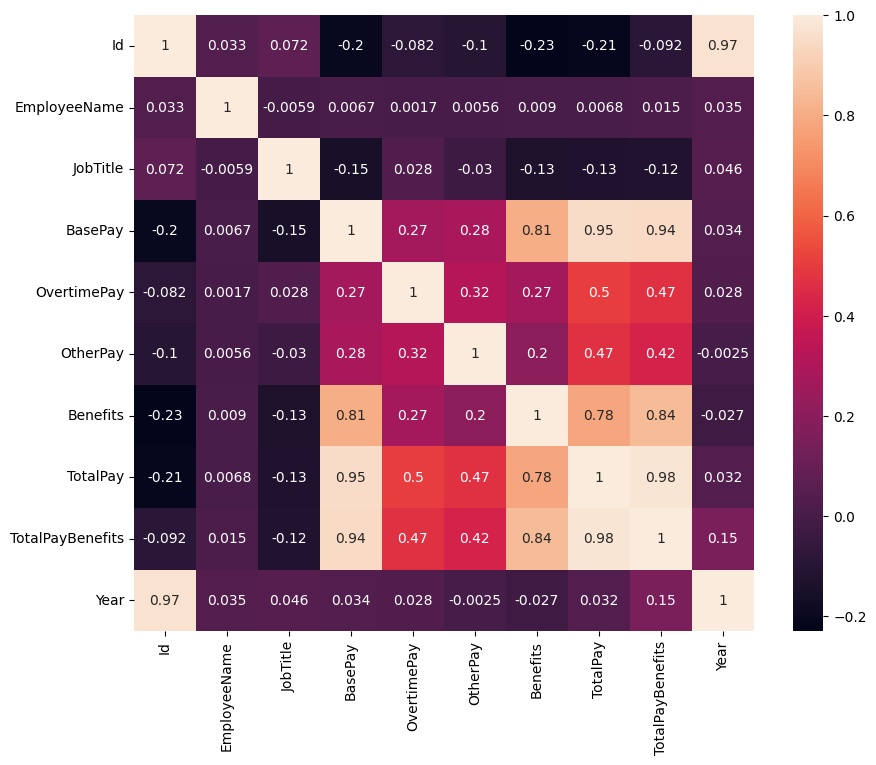

In [98]:
heat= df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(heat, annot=True)
plt.show()

In [99]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,77059,831,167411.18000,0.000000,400184.250000,25007.893151,567595.43,567595.43,2011
1,2,34410,293,155966.02000,245131.880000,137811.380000,25007.893151,538909.28,538909.28,2011
2,3,458,293,212739.13000,106088.180000,16452.600000,25007.893151,335279.91,335279.91,2011
3,4,13984,2125,77916.00000,56120.710000,198306.900000,25007.893151,332343.61,332343.61,2011
4,5,80493,576,134401.60000,9737.000000,182234.590000,25007.893151,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...,...
148649,148650,91653,562,0.00000,0.000000,0.000000,0.000000,0.00,0.00,2014
148650,148651,79495,1274,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014
148651,148652,79495,1274,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014
148652,148653,79495,1274,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014


Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

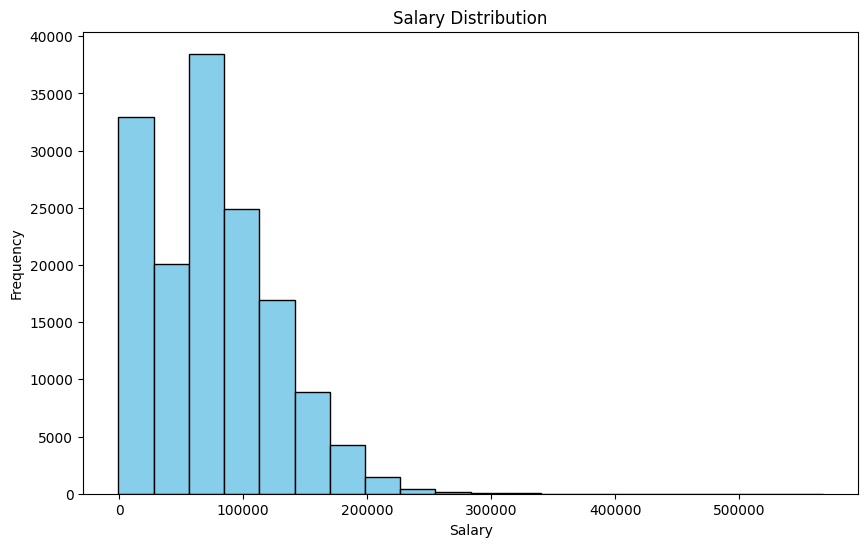

In [100]:
# Histogram for Salary Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

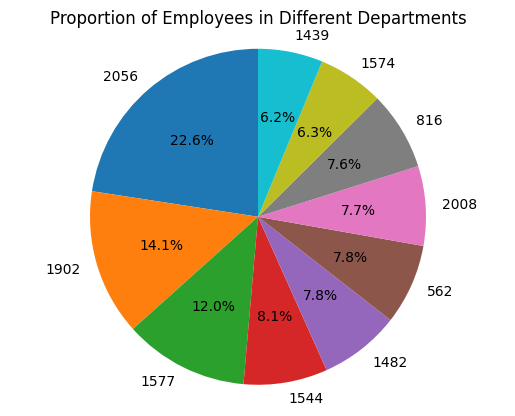

In [101]:
# Use a pie chart to represent the proportion of employees in different departments
department_counts = df['JobTitle'].value_counts().head(10)
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Employees in Different Departments')
plt.show()


In [110]:
df['EmployeeName']

0     John
1    Alice
2      Bob
3      Eva
4    Chris
Name: EmployeeName, dtype: object

In [111]:
df['JobTitle']

0      Manager
1      Analyst
2    Developer
3      Manager
4      Analyst
Name: JobTitle, dtype: object

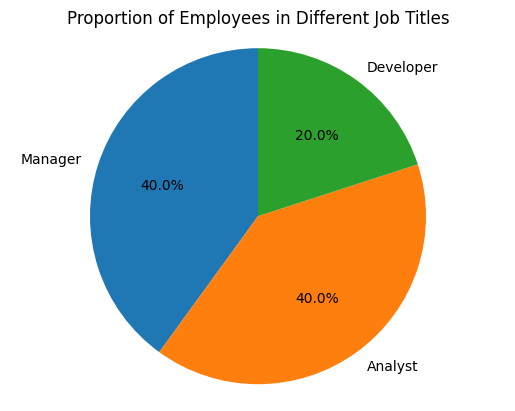

In [112]:
new_dataframe = {'EmployeeName': ['John', 'Alice', 'Bob', 'Eva', 'Chris'],
        'JobTitle': ['Manager', 'Analyst', 'Developer', 'Manager', 'Analyst']}

new_df = pd.DataFrame(new_dataframe)

# Count the occurrences of each job title
jobtitle_counts = new_df['JobTitle'].value_counts()

# Create a pie chart
plt.pie(jobtitle_counts, labels=jobtitle_counts.index, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('Proportion of Employees in Different Job Titles')

plt.show()


In [102]:
# Group the data by 'JobTitle' and calculate summary statistics for each group
grouped_data = df.groupby('JobTitle')['TotalPay'].agg(['mean', 'median', 'count'])
print("\nGrouped Analysis:")
print(grouped_data)


Grouped Analysis:
                  mean     median  count
JobTitle                                
0         44035.664337  49777.820     83
1         47429.268000  60076.240      5
2         29031.742917  17658.505     48
3         62290.780000  62290.780      1
4         67594.400000  67594.400      1
...                ...        ...    ...
2154      52705.880385  60333.125     26
2155      50823.942700  60047.290    100
2156      53632.870000  53632.870      1
2157      41414.307500  44449.895      4
2158      66686.560000  66686.560      1

[2159 rows x 3 columns]


Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship

In [103]:
# Identify correlation between 'TotalPay' and another numerical column (e.g., 'BasePay')
correlation = df['TotalPay'].corr(df['BasePay'])
print(f"\nCorrelation between TotalPay and BasePay: {correlation}")


Correlation between TotalPay and BasePay: 0.9505142922626454


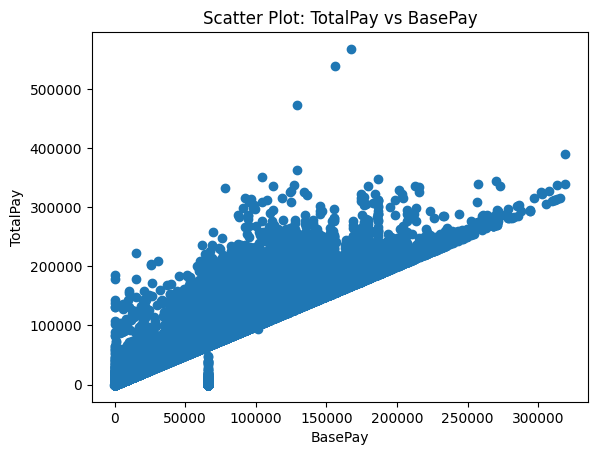

In [104]:
# Plot a scatter plot to visualize the relationship
plt.scatter(df['BasePay'], df['TotalPay'])
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()


Correlation between TotalPay and Year: 0.03209039798559024


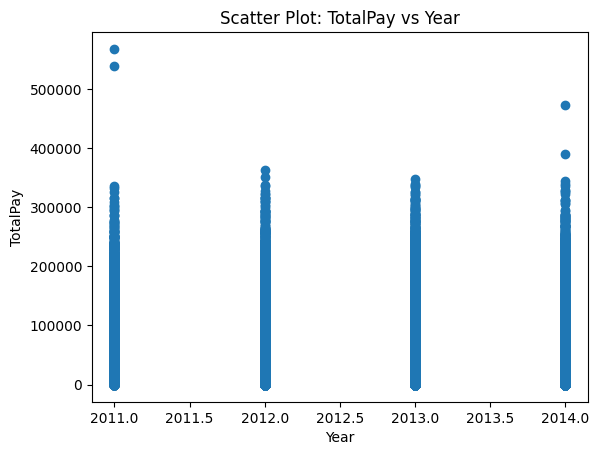

In [105]:
# Identify correlation between 'TotalPay' and another numerical column (e.g., 'Year')
correlation = df['TotalPay'].corr(df['Year'])
print(f"\nCorrelation between TotalPay and Year: {correlation}")

# Plot a scatter plot to visualize the relationship
plt.scatter(df['Year'], df['TotalPay'])
plt.title('Scatter Plot: TotalPay vs Year')
plt.xlabel('Year')
plt.ylabel('TotalPay')
plt.show()



Correlation between TotalPay and OvertimePay: 0.5048439903995623


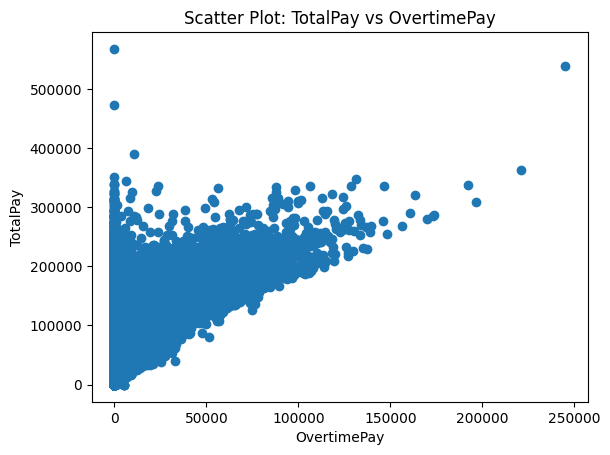

In [106]:
# Identify correlation between 'TotalPay' and another numerical column (e.g., 'OvertimePay')
correlation = df['TotalPay'].corr(df['OvertimePay'])
print(f"\nCorrelation between TotalPay and OvertimePay: {correlation}")

# Plot a scatter plot to visualize the relationship
plt.scatter(df['OvertimePay'], df['TotalPay'])
plt.title('Scatter Plot: TotalPay vs OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('TotalPay')
plt.show()
